<b>The code below used STLM by using only Capacity field to predict the RUL(STLM using one variable with multisteps)</b> 
<p>We built the model only on Battery B0005</p>

In [11]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score




df=pd.read_csv("discharge_onerow.csv")
featurs=['Batt_name','cycle','amb_temp','voltage_battery','current_battery','temp_battery','current_load','voltage_load','time','Capacity']
f1=['cycle','Capacity']
df=df[featurs]
dataset=df[(df.Batt_name =='B0005')| (df.Batt_name =='B0006') | (df.Batt_name =='B0007')|(df.Batt_name =='B0018')]
# Feature Selection
dataset=dataset[(dataset['Batt_name']=='B0005')]
dataset=dataset[f1]
data_train=dataset[(dataset['cycle']<90)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=90)]
data_set_test=data_test.iloc[:,1:2].values

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
#take the last 10t to predict 10t+1
for i in range(10,89):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


<b> Applied STLM </b>

In [ ]:
regress=Sequential()
regress.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))

regress.add(LSTM(units=50, return_sequences=True))
regress.add(Dropout(0.3))


regress.add(LSTM(units=50, return_sequences=True))
regress.add(Dropout(0.3))

regress.add(LSTM(units=50))
regress.add(Dropout(0.3))


regress.add(Dense(units=1))

regress.compile(optimizer='adam',loss='mean_squared_error')

regress.fit(X_train,y_train,epochs=200,batch_size=50)


Epoch 1/100
79/79 [==============================] - 3s 43ms/step - loss: 0.4145

Epoch 2/100
79/79 [==============================] - 0s 924us/step - loss: 0.3334

Epoch 3/100
79/79 [==============================] - 0s 904us/step - loss: 0.2314

Epoch 4/100
79/79 [==============================] - 0s 915us/step - loss: 0.1041

Epoch 5/100
79/79 [==============================] - 0s 928us/step - loss: 0.0579

Epoch 6/100
79/79 [==============================] - 0s 934us/step - loss: 0.0703

Epoch 7/100
79/79 [==============================] - 0s 917us/step - loss: 0.0401

Epoch 8/100
79/79 [==============================] - 0s 904us/step - loss: 0.0533

Epoch 9/100
79/79 [==============================] - 0s 925us/step - loss: 0.0419

Epoch 10/100
79/79 [==============================] - 0s 905us/step - loss: 0.0424

Epoch 11/100
79/79 [==============================] - 0s 909us/step - loss: 0.0375

Epoch 12/100
79/79 [==============================] - 0s 893us/step - loss: 0.0414

Epoch 13/100
79/79 [==============================] - 0s 904us/step - loss: 0.0325

Epoch 14/100
79/79 [==============================] - 0s 933us/step - loss: 0.0275

Epoch 15/100
79/79 [==============================] - 0s 873us/step - loss: 0.0318

Epoch 16/100
79/79 [==============================] - 0s 918us/step - loss: 0.0192

Epoch 17/100
79/79 [==============================] - 0s 918us/step - loss: 0.0207

Epoch 18/100
79/79 [==============================] - 0s 909us/step - loss: 0.0172

Epoch 19/100
79/79 [==============================] - 0s 901us/step - loss: 0.0186

Epoch 20/100
79/79 [==============================] - 0s 922us/step - loss: 0.0141

Epoch 21/100
79/79 [==============================] - 0s 920us/step - loss: 0.0172

Epoch 22/100
79/79 [==============================] - 0s 903us/step - loss: 0.0123

Epoch 23/100
79/79 [==============================] - 0s 904us/step - loss: 0.0131

Epoch 24/100
79/79 [==============================] - 0s 885us/step - loss: 0.0113

Epoch 25/100
79/79 [==============================] - 0s 914us/step - loss: 0.0123

Epoch 26/100
79/79 [==============================] - 0s 919us/step - loss: 0.0127

Epoch 27/100
79/79 [==============================] - 0s 930us/step - loss: 0.0107

Epoch 28/100
79/79 [==============================] - 0s 928us/step - loss: 0.0131

Epoch 29/100
79/79 [==============================] - 0s 924us/step - loss: 0.0168

Epoch 30/100
79/79 [==============================] - 0s 896us/step - loss: 0.0104

.
.
.
.

Epoch 100/100
79/79 [==============================] - 0s 889us/step - loss: 0.0091

Out[213]: <keras.callbacks.History at 0x7f9ad516aef0>

<b> Test the Model that was built by STLM</b>

In [2]:
#### predictions
data_total=pd.concat((data_train['Capacity'],data_test['Capacity']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [ ]:
X_test=[]
for i in range(10,89):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred=regress.predict(X_test)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test RMSE: %.3f' % rmse)

metrics.r2_score(tests,pred)

Test RMSE: 0.030


R^2: 0.8916473658827782

RUL(Error)=|126-125|
=1 cycle 

In [7]:
pred4=[1.5109049, 1.5067059, 1.5034488, 1.5005403, 1.498761 , 1.4981421,
       1.4992642, 1.5018138, 1.503656 , 1.5056738, 1.5075662, 1.492796 ,
       1.4839845, 1.4767292, 1.4711597, 1.465779 , 1.4615036, 1.4575909,
       1.454027 , 1.4506783, 1.4484158, 1.4462972, 1.4443446, 1.4424661,
       1.4380679, 1.4311802, 1.425846 , 1.4214693, 1.4188418, 1.4155321,
       1.4114283, 1.4077026, 1.405254 , 1.4034641, 1.4015648, 1.4002702,
       1.3994751, 1.3991467, 1.3991414, 1.3986106, 1.3982402, 1.3933313,
       1.3868399, 1.3825758, 1.3791816, 1.3761727, 1.3734736, 1.3712626,
       1.3694792, 1.3682021, 1.3673415, 1.3668255, 1.3659699, 1.3655413,
       1.3632015, 1.3588042, 1.3560386, 1.3534404, 1.3517599, 1.3495598,
       1.3468499, 1.3443987, 1.3423759, 1.3409755, 1.3396008, 1.3388804,
       1.3388563, 1.3395094, 1.340758 , 1.3418714, 1.3428435, 1.3428377,
       1.3375453, 1.3343163, 1.3319844, 1.3299532, 1.3282046, 1.3267752,
       1.3251127]

In [3]:
pred2=[1.5095047, 1.505182 , 1.5017349, 1.4985278, 1.4964548, 1.4956222,
       1.4967338, 1.4995174, 1.5016944, 1.5042136, 1.5067403, 1.4912944,
       1.482186 , 1.4747189, 1.4690324, 1.4634969, 1.4590889, 1.4550277,
       1.4513285, 1.4478728, 1.4456096, 1.4435389, 1.4416875, 1.4399569,
       1.435547 , 1.4284523, 1.4229819, 1.4185165, 1.4159185, 1.412598 ,
       1.4084224, 1.4046086, 1.4020915, 1.4002208, 1.3982018, 1.3968226,
       1.3960024, 1.3957292, 1.3958644, 1.395504 , 1.3953686, 1.3904271,
       1.3837754, 1.379454 , 1.3760293, 1.3729705, 1.370195 , 1.367903 ,
       1.3660536, 1.3647503, 1.3639095, 1.3634626, 1.3626862, 1.3623906,
       1.3600874, 1.3555952, 1.3528095, 1.3501998, 1.348567 , 1.346395 ,
       1.3436819, 1.3412246, 1.3391671, 1.3377022, 1.3362108, 1.3353803,
       1.3352875, 1.3359427, 1.3372804, 1.3385375, 1.3397032, 1.3398769,
       1.3344688, 1.331196 , 1.3288473, 1.326803 , 1.3250507, 1.3236343,
       1.3219578]

In [9]:
len(pred4)
data_test['pre']=pred4
print(data_test.head())

     cycle  Capacity       pre
469     90  1.605819  1.510905
470     91  1.563849  1.506706
471     92  1.548092  1.503449
472     93  1.532376  1.500540
473     94  1.526953  1.498761


/home/khaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Discharge B0005')

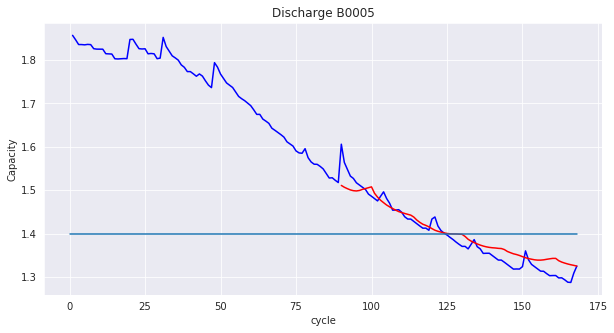

In [10]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','Capacity']]
plot_per=data_test.loc[(data_test['cycle']>=90),['cycle','pre']]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['Capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['pre'],label="Prediction data", color='red')
#plt.plot(pred)
#Draw threshold
plt.plot([0.,168], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')